Git-boken - 

Databehandling 2025-11-07

concat()

concat() makes a full copy of the data, and iteratively reusing concat() can create unnecessary copies. Collect all DataFrame or Series objects in a list before using concat().  
  
frames = [process_your_file(f) for f in files]  
result = pd.concat(frames)  
  
When concatenating DataFrame with named axes, pandas will attempt to preserve these index/column names whenever possible. In the case where all inputs share a common name, this name will be assigned to the result. When the input names do not all agree, the result will be unnamed. The same is true for MultiIndex, but the logic is applied separately on a level-by-level basis.  

In [112]:
import pandas as pd 

df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

frames = [df1, df2, df3] 

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


**Joining logic of the resulting axis**  



The join keyword specifies how to handle axis values that don’t exist in the first DataFrame.  

In [116]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


result = pd.concat([df1, df4], axis=1)

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


***join='inner' takes the intersection of the axis values***

In [117]:
result = pd.concat([df1, df4], axis=1, join="inner")

result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


To perform an effective “left” join using the exact index from the original DataFrame, result can be reindexed.

In [118]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index) # use the index of df1     

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


***Ignoring indexes on the concatenation axis*** 



For DataFrame objects which don’t have a meaningful index, the ignore_index ignores overlapping indexes.

In [119]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)

result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


Concatenating Series and DataFrame together  



You can concatenate a mix of Series and DataFrame objects. The Series will be transformed to DataFrame with the column name as the name of the Series.

In [120]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")

result = pd.concat([df1, s1], axis=1)

result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


***Unnamed Series will be numbered consecutively.***

In [121]:
s2 = pd.Series(["_0", "_1", "_2", "_3"])

result = pd.concat([df1, s2, s2, s2], axis=1)

result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


ignore_index=True will drop all name references.

In [ ]:
result = pd.concat([df1, s1], axis=1, ignore_index=True)

result

***Resulting keys*** 



The keys argument adds another axis level to the resulting index or column (creating a MultiIndex) associate specific keys with each original DataFrame. (gör om från 2-dimisionell till 3D, kallas tensor. Matris=2D). 

In [127]:
result = pd.concat(frames, keys=["x", "y", "z"])

result


A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [124]:

result.loc["y"] 

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


The keys argument cane override the column names when creating a new DataFrame based on existing Series.

In [125]:
s3 = pd.Series([0, 1, 2, 3], name="foo")

s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [126]:
pd.concat([s3, s4, s5], axis=1, keys=["red", "blue", "yellow"])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


You can also pass a dict to concat() in which case the dict keys will be used for the keys argument unless other keys argument is specified (Om man ska loopa över komplicerad data och inte använda concat om och om igen.) 

In [128]:
pieces = {"x": df1, "y": df2, "z": df3}

result = pd.concat(pieces)

result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [ ]:
# choose your own keys through a list 
result = pd.concat(pieces, keys=["z", "y"])

result

A    B    C    D
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7

The MultiIndex created has levels that are constructed from the passed keys and the index of the DataFrame pieces:

In [130]:
result.index.levels

FrozenList([['z', 'y'], [4, 5, 6, 7, 8, 9, 10, 11]])

levels argument allows specifying resulting levels associated with the keys

In [131]:
result = pd.concat(
    pieces, keys=["x", "y", "z"], levels=[["z", "y", "x", "w"]], names=["group_key"]
)


result

A    B    C    D
group_key                       
x         0    A0   B0   C0   D0
          1    A1   B1   C1   D1
          2    A2   B2   C2   D2
          3    A3   B3   C3   D3
y         4    A4   B4   C4   D4
          5    A5   B5   C5   D5
          6    A6   B6   C6   D6
          7    A7   B7   C7   D7
z         8    A8   B8   C8   D8
          9    A9   B9   C9   D9
          10  A10  B10  C10  D10
          11  A11  B11  C11  D11

In [132]:
result.index.levels

FrozenList([['z', 'y', 'x', 'w'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

***Appending rows to a DataFrame***

If you have a Series that you want to append as a single row to a DataFrame, you can convert the row into a DataFrame and use concat()

In [ ]:
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])

result = pd.concat([df1, s2.to_frame().T], ignore_index=True)

result

**merge()**


merge() performs join operations similar to relational databases like SQL. Users who are familiar with SQL but new to pandas can reference a comparison with SQL.  
  
Merge types  
merge() implements common SQL style joining operations.  
  
one-to-one: joining two DataFrame objects on their indexes which must contain unique values.  
  
many-to-one: joining a unique index to one or more columns in a different DataFrame.  
  
many-to-many : joining columns on columns.  
  
When joining columns on columns, potentially a many-to-many join, any indexes on the passed DataFrame objects will be discarded.

For a many-to-many join, if a key combination appears more than once in both tables, the DataFrame will have the Cartesian product of the associated data. (alla kombinationer)

In [ ]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on="key")

result

The how argument to merge() specifies which keys are included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:  
  


**Merge method**.. SQL JOIN NAMNE .... ***Description***  
**left**............................ LEFT OUTER JOIN ......***Use keys from left frame only***  
**right**......................... RIGHT OUTER JOIN.. ***Use keys from right frame only***  
**outer**........................ FULL OUTER JOIN ....***Use union of keys from both frames***  
**inner**........................ INNER JOIN ...............***Use intersection of keys from both frames***  
**cross**........................ CROSS JOIN ...............***Create the cartesian product of rows of both frames***  

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)


right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)


result = pd.merge(left, right, how="left", on=["key1", "key2"])

result

In [ ]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])

result

In [ ]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])

result

In [ ]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])

result

In [ ]:
result = pd.merge(left, right, how="cross")

result

You can Series and a DataFrame with a MultiIndex if the names of the MultiIndex correspond to the columns from the DataFrame. Transform the Series to a DataFrame using Series.reset_index() before merging

In [ ]:
df = pd.DataFrame({"Let": ["A", "B", "C"], "Num": [1, 2, 3]})

df

In [ ]:
ser = pd.Series(
    ["a", "b", "c", "d", "e", "f"],
    index=pd.MultiIndex.from_arrays(
        [["A", "B", "C"] * 2, [1, 2, 3, 4, 5, 6]], names=["Let", "Num"]
    ),
)


ser

In [ ]:
pd.merge(df, ser.reset_index(), on=["Let", "Num"])

Performing an outer join with duplicate join keys in DataFrame

In [ ]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

result = pd.merge(left, right, on="B", how="outer")

result

Merging on duplicate keys significantly increase the dimensions of the result and can cause a memory overflow.

Merge key uniqueness

**databehandling 2025-11-03**

Plotly Express
Bra verktyg för presentationer 

- Ord:  
Logaritmisk -   

måndag vecka 46 distans måndag. 
onsdag gruppindelning 
redovisning för projektet, både i grupp och individuellt. 


pip install plotly  
pip install plotly_express  
pip install nbformat  


In [ ]:
import plotly_express as px 
gapminder = px.data.gapminder()

# compare nordic countries 
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic2007 = nordic[nordic["year"]==2007]

nordic.country.value_counts()

In [ ]:
sweden = gapminder[gapminder["country"] == "Sweden"]
sweden.head()

In [ ]:
fig = px.bar(sweden, x="year", y="pop", range_y=[
       5e6, 10e6], title=f"Population in Sweden {sweden['year'].min()}-{sweden['year'].min()}",
       labels = dict(year="Year", pop="Population")) # NOTE: year and pop in labels dictionary are the previous names 

fig.show() # install nbformat >= 4.2.0 and jupyter notebook renderer extension 

In [ ]:
# compare Nordic countries 
fig = px.bar(nordic2007, x="country", y="gdpPercap", color="country", title="Nordic countries GDP per cap year 2007")
fig.show()

In [ ]:
fig = px.line(sweden, x="year", y="gdpPercap", title="GDP per capita Sweden")
fig.show()

In [ ]:
# adding some useful settings
fig = px.line(nordic, x="year", y="gdpPercap", color="country",
              title="Nordic countries GDP per capita 1952-2007",
              labels={"gdpPercap":"GDP per capita"})

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)

fig.show()

Pie chart  

Gapminder - bubble chart
- bubble chart using scatter
- many dimensions can be shown using bubble charts as you can control:
- size  
- x, y
- hover data
- color
- run the code in a python script for animation to work (funkar inte alltid i jupyter notebook)

In [ ]:
fig = px.pie(nordic2007, values="pop", title="Population of nordic countries", names="country",
             hover_data=["gdpPercap"])

fig.update_traces(textinfo="label+percent")
fig.show()

In [ ]:
# tre dimensioner 

gapminder.head()


In [ ]:

len(gapminder["country"].unique())


In [ ]:

fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp",
           size="pop", color="country", size_max=70, log_x=True,
           animation_frame="year", animation_group="country", title="Gapminder",
           range_x=[100, 100000], range_y=[25,90])
fig.show()

Stockdata 1 - API  
- Stocks API
- Go into Alpha Vantage and read the documentation of the time series APIs

- Go into claim API key and fill in the form to claim your free API-key

- You will be using the API key to access stock data

- Create a file called .env and type:

- ALPHA_API_KEY = ...  
the dots should be your API key  
go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name  
  
Setup  
  
pip install python-dotenv  
Symbols of stocks that is useful for get-request  

In [ ]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"] #list of stock symbols
stock_list = [] #empty list to store dataframes 

for symbol in symbols: #loop through each stock symbol
    function = "TIME_SERIES_INTRADAY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    #url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json() #omvandla till json format
    df = pd.DataFrame(data["Time Series (5min)"]).transpose() #transpose to get time series as rows
    df = df["4. close"].rename(symbol).astype(float) #select only closing price and rename column
    df = df.reset_index().rename(columns={"index":"datetime"}) #reset index to get datetime as a column 
    stock_list.append(df)

In [66]:
stock_list

[2025-10-31 19:55:00    269.9995
 2025-10-31 19:50:00    269.9700
 2025-10-31 19:45:00    269.9500
 2025-10-31 19:40:00    269.9975
 2025-10-31 19:35:00    269.9500
                          ...   
 2025-10-31 12:00:00    271.1448
 2025-10-31 11:55:00    271.4500
 2025-10-31 11:50:00    271.0400
 2025-10-31 11:45:00    270.6850
 2025-10-31 11:40:00    271.0200
 Name: AAPL, Length: 100, dtype: float64,
 2025-10-31 19:55:00    202.6200
 2025-10-31 19:50:00    202.7800
 2025-10-31 19:45:00    202.7400
 2025-10-31 19:40:00    202.7797
 2025-10-31 19:35:00    202.7650
                          ...   
 2025-10-31 12:00:00    204.0299
 2025-10-31 11:55:00    203.7750
 2025-10-31 11:50:00    204.3635
 2025-10-31 11:45:00    204.4150
 2025-10-31 11:40:00    205.2900
 Name: NVDA, Length: 100, dtype: float64,
 2025-10-31 19:55:00    456.0600
 2025-10-31 19:50:00    455.9500
 2025-10-31 19:45:00    455.6200
 2025-10-31 19:40:00    455.6185
 2025-10-31 19:35:00    455.5600
                         

In [67]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks

,AAPL,NVDA,TSLA,IBM
2025-10-31 19:55:00,269.9995,202.6200,456.0600,307.310
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.800
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.250
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.870
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.600
...,...,...,...,...
2025-10-31 12:00:00,271.1448,204.0299,452.8000,304.455
2025-10-31 11:55:00,271.4500,203.7750,453.7800,304.290
2025-10-31 11:50:00,271.0400,204.3635,454.4250,304.325
2025-10-31 11:45:00,270.6850,204.4150,454.9300,304.470


In [ ]:
# plotting stocks data  

import plotly_express as px

# initial plot
px.line(stocks, x=stocks.index, y=[
        "AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Some stocks", log_y=True)

In [72]:
# working with time series index

print(stocks.index.dtype)
# type cast index from object to datetime
stocks.index = pd.to_datetime(stocks.index) # cast index to datetime, omvandla typen till datetime
print(stocks.index.dtype)
stocks.head()

datetime64[ns]
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2025-10-31 19:55:00,269.9995,202.6200,456.0600,307.31
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.80
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.25
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.87
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.60


In [73]:
stocks.loc["2024-11-04 20:00:00"]  # gives all data where year is 2020

KeyError: '2024-11-04 20:00:00'

In [74]:
stocks.sort_index().loc["2024-11-03":"2025-11-04"]  # gives all rows between these times

,AAPL,NVDA,TSLA,IBM
2025-10-31 11:40:00,271.0200,205.2900,455.6209,305.344
2025-10-31 11:45:00,270.6850,204.4150,454.9300,304.470
2025-10-31 11:50:00,271.0400,204.3635,454.4250,304.325
2025-10-31 11:55:00,271.4500,203.7750,453.7800,304.290
2025-10-31 12:00:00,271.1448,204.0299,452.8000,304.455
...,...,...,...,...
2025-10-31 19:35:00,269.9500,202.7650,455.5600,307.600
2025-10-31 19:40:00,269.9975,202.7797,455.6185,307.870
2025-10-31 19:45:00,269.9500,202.7400,455.6200,307.250
2025-10-31 19:50:00,269.9700,202.7800,455.9500,307.800



Plot 4 stocks in subplots

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)
array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)


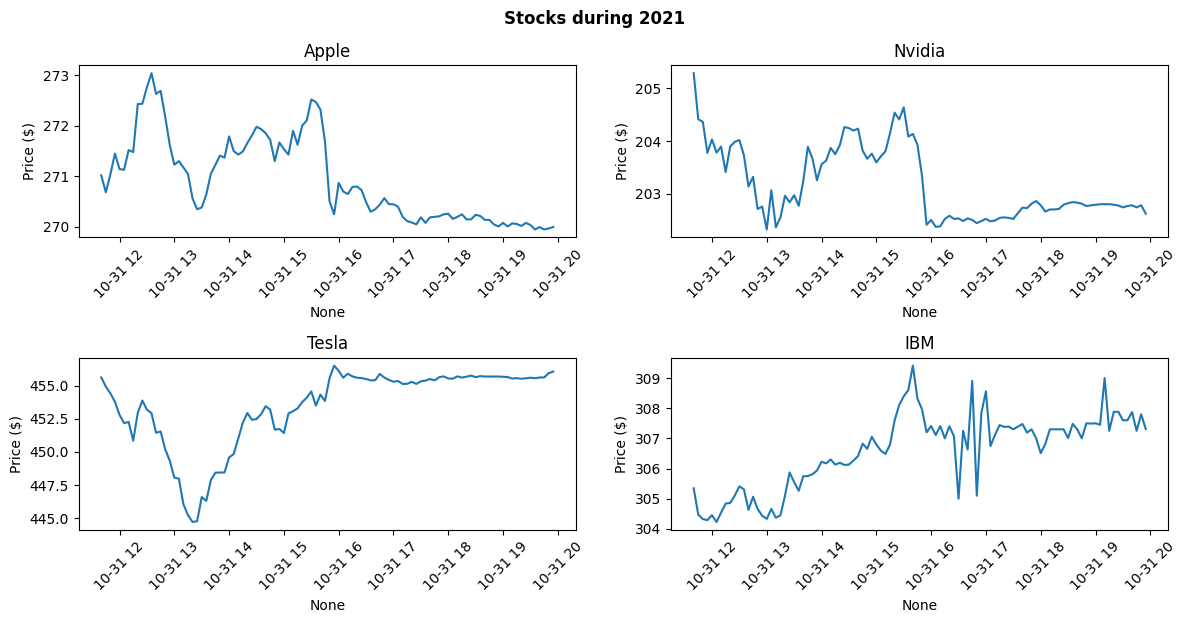

In [ ]:
# plotting multiple stocks with seaborn and matplotlib  
# flattening 2D array of axes to 1D array for easy iteration    

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,6))

# 2D array -> 2D array has a method flatten() to create a numpy flattened array
print(repr(axes))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia",
               "TSLA": "Tesla", "IBM": "IBM"}

stocks_2022 = stocks.loc["2025"]

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2022, x=stocks_2022.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")
    #ax.grid()

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold"); # add a main title 

In [ ]:
# Download and save stocks data from Alpha Vantage API in CSV files

import time

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    for function, time_column in zip(["TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY_EXTENDED"], ["timestamp", "time"]):
        url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&datatype=csv&outputsize=full&interval=60min"

        df = pd.read_csv(url)
        df.set_index(df[time_column], inplace=True)
        df.index = pd.to_datetime(df.index)
        df.drop(time_column, axis=1, inplace=True)
        df.to_csv(f"../Data/Stocksdata/{symbol}_{function}.csv")

        # to not overload API
        time.sleep(15) 

- Merge, join, concatenate, (append), read_html, 
- data wrangling
- kategorisk data - yes or no (kategori, kategorisk data), även hög, medel låg exemeplvis. 
- imputation - 
- concat


In [ ]:

import pandas as pd 
import numpy as np 

df1 = pd.DataFrame(np.arange(16).reshape(4,4), columns=list("ABCD"))  # create dataframe with values 0-15 reshaped to 4x4
df2 = pd.DataFrame(np.zeros((3,4)), columns=list("ABCD")) # create dataframe with zeros 3x4
df3 = pd.DataFrame(np.ones((4,3)), index=[1,5,10,15]) # create dataframe with ones 4x3 with custom index
df1


,0,1,2
1,1.0,1.0,1.0
5,1.0,1.0,1.0
10,1.0,1.0,1.0
15,1.0,1.0,1.0


In [78]:
df2

,A,B,C,D
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [79]:
df3

,0,1,2
1,1.0,1.0,1.0
5,1.0,1.0,1.0
10,1.0,1.0,1.0
15,1.0,1.0,1.0


Concat (sätter ihop två stycken listor av nåt slag) - kopierar data  
concatenates pandas objects along particular axis
there are optional set logic along other axes
concat() copies the data, if using concat() on many datasets, use list comprehensions


Concat
concatenates pandas objects along particular axis
there are optional set logic along other axes
concat() copies the data, if using concat() on many datasets, use list comprehensions
Set logic:

Venndiagram 

U - union
n - Intersection

left side: (hela figuren markerad) - det som kommer ut om vi inte skriver någonting
 (union)

right side: (bara mitten markerad)
 (intersection)

In [80]:
# same column names, just add the second df rows to the first
pd.concat([df1,df2]) # by default axis = 0 or "rows"

,A,B,C,D
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0
3,12.0,13.0,14.0,15.0
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [ ]:
# concats on the index 
# NOTE: NaNs due to df2 shape is (3,4) while df1 shape is (4,4)
pd.concat([df1,df2], axis = "columns") # lägger kolumnerna brevid varandra # NaN where no matching index

,A,B,C,D,A,B,C,D
0,0,1,2,3,0.0,0.0,0.0,0.0
1,4,5,6,7,0.0,0.0,0.0,0.0
2,8,9,10,11,0.0,0.0,0.0,0.0
3,12,13,14,15,NaN,NaN,NaN,NaN


In [ ]:
# NOTE: index 1 is shared while others are not 
pd.concat([df1,df3], axis = 1)  # join="outer by default" # NaNs where no matching index

,A,B,C,D,0,1,2
0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
1,4.0,5.0,6.0,7.0,1.0,1.0,1.0
2,8.0,9.0,10.0,11.0,NaN,NaN,NaN
3,12.0,13.0,14.0,15.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,1.0,1.0
10,NaN,NaN,NaN,NaN,1.0,1.0,1.0
15,NaN,NaN,NaN,NaN,1.0,1.0,1.0



**Merge**  , slå ihop två dataframes. 
- high performance join operations similar to relational databases
- performance is faster using merge/join in Pandas than in SQL
- Relational algebra

- one-to-one - joining 2 dfs on their index
- many-to-one - joining a unique index to ≥ 1 cols in different df
- many-to-many - joining columns on columns

In [ ]:
# merge
left = pd.DataFrame({"key": ["K0", "K0", "K1", "K2"], # hashtabell
                     "A": ["A0", "A1", "A2", "A3"],
                     "B": ["B0", "B1", "B2", "B3"],
                     })
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"],
                     "C": ["C0", "C1", "C2", "C3"],
                      "D": ["D0", "D1", "D2", "D3"]})


print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K0  A1  B1
2  K1  A2  B2
3  K2  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [85]:
pd.merge(left, right, on="key", indicator=True)  # default inner join


,key,A,B,C,D,_merge
0,K0,A0,B0,C0,D0,both
1,K0,A1,B1,C0,D0,both
2,K1,A2,B2,C1,D1,both
3,K2,A3,B3,C2,D2,both


In [86]:
left.merge(right, on="key", how="outer", indicator=True)  # outer join


,key,A,B,C,D,_merge
0,K0,A0,B0,C0,D0,both
1,K0,A1,B1,C0,D0,both
2,K1,A2,B2,C1,D1,both
3,K2,A3,B3,C2,D2,both
4,K3,NaN,NaN,C3,D3,right_only


In [87]:
left.merge(right, on="key", how="left", indicator=True)  # left join

,key,A,B,C,D,_merge
0,K0,A0,B0,C0,D0,both
1,K0,A1,B1,C0,D0,both
2,K1,A2,B2,C1,D1,both
3,K2,A3,B3,C2,D2,both


In [83]:
# inner join - set logic intersection "A and B"
pd.concat([df1,df3], axis ="columns", join="inner") 

,A,B,C,D,0,1,2
1,4,5,6,7,1.0,1.0,1.0


In [ ]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "A": ["A0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

print(left)

print(right)

# A_x is from left, A_y is from right, since A exist in both dataframes


  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   A   D
0   K0   K0  A0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


,key1,key2,A_x,B,A_y,D,_merge
0,K0,K0,A0,B0,A0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only


In [ ]:
# only keys present in left
left.merge(right, on=["key1", "key2"], how="left", indicator=True)

In [90]:
# keys in right
left.merge(right, on=["key1", "key2"], how="right", indicator=True, suffixes=["_left","_right"]) # specify suffixes for overlapping column names (A_left, A_right)

,key1,key2,A_left,B,A_right,D,_merge
0,K0,K0,A0,B0,A0,D0,both
1,K1,K0,A2,B2,C1,D1,both
2,K1,K0,A2,B2,C2,D2,both
3,K2,K0,NaN,NaN,C3,D3,right_only



**Join** - liknar merge
- combine cols of two potentially different index dfs
- uses merge internally

In [93]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
left, right

(     A   B
 K0  A0  B0
 K1  A1  B1
 K2  A2  B2,
      C   D
 K0  C0  D0
 K2  C2  D2
 K3  C3  D3)

In [ ]:
left.join(right) # joins on left , börjar med vänster df och lägger till höger df

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
left.join(right, how = "right") # joins on right, börjar med höger df och lägger till vänster df    

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [ ]:
left

print(left.apply(lambda x: x + 'a')) # för att lägga till 'a' till varje element i df   

      A    B
K0  A0a  B0a
K1  A1a  B1a
K2  A2a  B2a



**Webscrape HTML tables** shift control I för att få upp elementen på hemsidan. 
- nu mer vanligt att man köper ett paket med data från en databroker. 

In [ ]:
# wikipedia funkar inte då den blockerar webscraping (user agent "låtsas vara en webbläsare", för att kringgå blockeringen, kanske inte är superbra dock). Men exemplet kan funkar på andra sidor

tables_list = pd.read_html(
    "https://tabellen.se/fotboll/champions-league")

tables_list.__len__()

2

In [105]:
df = tables_list[0] # first table in the html page 
df.head()

,#,Lag,S,V,O,F,+/-,P
0,1,Bayern Munchen,4,4,0,0,14-3,12
1,2,Arsenal FC,4,4,0,0,11-0,12
2,3,PSG,4,3,0,1,14-5,9
3,4,Inter,3,3,0,0,9-0,9
4,5,Real Madrid,4,3,0,1,8-2,9


**Databehandling 2025-10-31**

Dataset från kaggle 

serier - vad påverkar det? 
skilland mellan series och dataframe? series är en kollumn i en dataframe. 

loc (explicit index) och iloc vid slicing. Alltid använda iloc numera. 

funktioner på en dataframe (df)

In [ ]:
https://sv.wikipedia.org/wiki/Soluppg%C3%A5ng

**Databehandling 2025-10-29**

Setup dummy Dataframe
redundant? redundance - samma information i flera kolumner? 



***Saknade värden***  
- Viktigt att veta vad värdena betyder, kan de tas bort? eller ersättas med nåt? 
- Pandas behandla None,nun och NA nästan likadant 
- Datastorleken spelar roll - små dataset - måste vara mer försiktig med data, stora dataset - med få "nulls", kan antagligen ta bort hela rader. 
- kan vara en viktig datapunkt att datan saknas. Kan vara värdefull information som saknas. 
- titta på hur stor procent av värdena som saknas
- saknad data kan ha en negativ påverkan på datavisualisering, machinelearning algorithms, arithmetic computations


***Aggrigationer och Grupby***

In [106]:
import numpy as np
import pandas as pd

n = 8
random_matrix = np.random.randint(1,10, (n, n)) #8*8 matrix with random integers
index = np.random.choice(random_matrix.size, 10, replace=False) 
print(f"index: {index}")
print(F"Flattened matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 #convert to float matrix
random_matrix.ravel()[index] = None
print(random_matrix) # vad betyder det att ett värde inte finns med? NaN = Not a Number



index: [22 52 58 62 25 27 39 43 28 33]
Flattened matrix: [3 8 5 1 4 3 5 3 9 9 6 8 5 4 4 4 3 7 5 1 6 7 1 5 6 7 9 1 8 5 5 5 9 8 8 4 8
 9 9 4 3 9 3 2 2 5 4 3 1 5 7 6 3 8 8 4 2 2 5 9 6 9 6 5]
[[ 3.  8.  5.  1.  4.  3.  5.  3.]
 [ 9.  9.  6.  8.  5.  4.  4.  4.]
 [ 3.  7.  5.  1.  6.  7. nan  5.]
 [ 6. nan  9. nan nan  5.  5.  5.]
 [ 9. nan  8.  4.  8.  9.  9. nan]
 [ 3.  9.  3. nan  2.  5.  4.  3.]
 [ 1.  5.  7.  6. nan  8.  8.  4.]
 [ 2.  2. nan  9.  6.  9. nan  5.]]


In [ ]:
scores = pd.DataFrame(random_matrix, 
                    index=[f"player{i}" for i in range(1, n+1)],
                    columns=[f"player{i}" for i in range(1, n+1)])
print(scores)

In [ ]:
scores.isnull() # kolla vilka värden som är saknade 

In [ ]:
scores.dropna() # tar bort rader med saknade värden 

In [ ]:
scores.dropna(axis="columns") # tar bort kolumner med saknade värden

In [ ]:
scores.fillna(0)  # ersätter saknade värden med 0   

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Median male age: 29.0
Median female age: 27.0
144


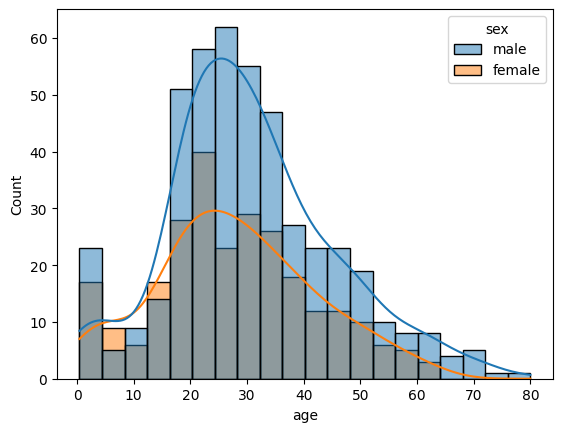

In [107]:
# Kolla på titanic dataset
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()  

nulls = titanic.isnull().sum()
print(nulls)    

# Histogram över kön
sns.histplot(data=titanic, x="age", hue="sex", kde=True)    

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median() 

print(f"Median male age: {median_male_age}")
print(f"Median female age: {median_female_age}")   

titanic.loc[(titanic["sex"] == "male", "age")] = titanic.loc[(titanic["sex"] == "male", "age")].fillna(median_male_age)
titanic.loc [(titanic["sex"] == "female", "age")] = titanic.loc[(titanic["sex"] == "female", "age")].fillna(median_female_age)

titanic.loc[titanic["age"]==29,"age"] = None # via loc kan man skriva komma och fortsätta direkt efteråt (maskningar) 

print(titanic.isnull().sum().loc["age"])


In [108]:
print(titanic.isnull().sum().loc["age"])
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()


144


sex
male      137
female      7
Name: count, dtype: int64

**Databehandling 2025-10-28**

**L0-pandas-basics**.ipynb (raphaels github) 

.loc    # 
.iloc   # 

- Slicing dataframes
- Masking - skicka in en array med en mask i, välja ut/byta ut värden. 
- Read excel data # df.info() # df["foodcategory"].uniqe() 
- Data cleaning 
- Sortera data # .sort_values() # ascending=false (från störst till lägst) # top 5 median - .groupby, .median, .sort_values, ascending=False, .head()
- 

In [ ]:

import sys, pandas as pd, numpy as np
print(sys.executable)
print(pd.__version__, np.__version__)
pd.DataFrame({"a":[1,2], "b":[3,4]})



In [ ]:
import pandas as pd

data = dict(AI = 25, NET = 30,  APP = 30) 

series_programs = pd.Series(data=data) 

#extract values (behandla som en lista även om det är en dict)
print(f"series_programs[0] -> {series_programs[0]}")
print(f"series_programs[0] -> {series_programs[-1]}")

# get keys
print(f"series_programs.keys[0] -> {series_programs.keys()}") 
print(f"series_programs.keys[0] -> {series_programs.keys()[2]}") 

***Aggregations and groupby***  
(mixa inte ihop agg() med aggregate() )

Aggregations:  (variabler som vi tittar på för att lära oss nåt om systemet. genom att kombinera variablerna kan vi räkna ut nya variabler. exempelvi acceleration på en boll - hastighet och motstånd..)
sum(), mean(), median(), min(), max())



In [ ]:
survivors = titanic.groupby("sex").mean(numeric_only=True)[["survived", "age"]] #numeric_only föra att ara plocka kolumner som har siffror i
for i in survivors.index:
    survived_percentage = survivors.loc[i, 'survived'] * 100
    print(f"Survival percentage for {i}: {survived_percentage:.1f}%")
    print(f"Mean age for {i}: {survivors.loc[i, 'age']:.1f} years")


In [109]:
titanic.groupby("class")[["age", "fare"]].max()

C:\Users\fanny\AppData\Local\Temp\ipykernel_28140\55204569.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [110]:
titanic.agg({"age": ["mean", "min", "max"], "fare": ["mean", "min", "max"]})


,age,fare
mean,29.526332,32.204208
min,0.420000,0.000000
max,80.000000,512.329200


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Survival count in titanic vs class')]

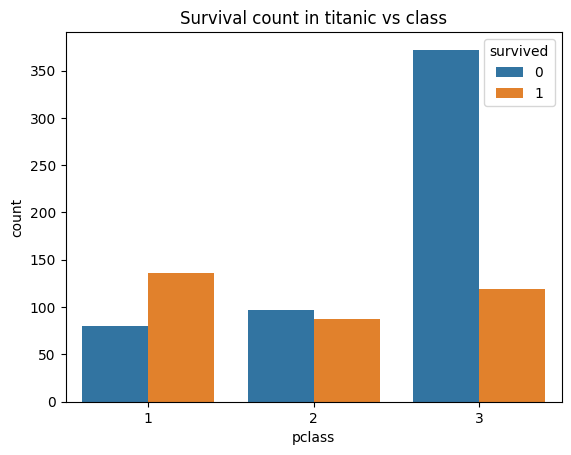

In [111]:
survived_class = titanic.groupby(["survived", "pclass"]).count()
survived_class = survived_class.reset_index()
ax = sns.barplot(data=survived_class, x="pclass", y="who", hue="survived")  # who = antal personer, hue = överlevde eller inte  
ax.set(ylabel="count", title="Survival count in titanic vs class")

In [ ]:
import random as rnd
rnd.seed(42)

# create Series using list
dice_series = pd.Series([rnd.randint(1,6) for _ in range(5)])
print(dice_series)

print(f"Min value: {dice_series.min()}")
print(f"Mean value: {dice_series.mean()}") #deskriptiva statistics
print(f"Median value: {dice_series.median()}") #deskriptiva statistics

In [ ]:
# Slicing DataFrames
df_programs = pd.DataFrame({
    "Language": ["Python", "Java", "C#", "JavaScript", "Ruby"],
    "Students": [150, 120, 100, 130, 80]
})  

print (df_programs)
